Notebook zur Berechnung der Wölbschubspannungen in einem Rechteckquerschnitt
=======
Das in dieser Datei gerechnete Beispiel ist ein beidseitig eingespannter Träger, der durch ein mittiges Torsionsmoment belastet wird.

<div style="background-color:lightblue;text-align:center"> 
Um den Code in einer Zelle auszuführen jeweils [Shift+Enter] drücken.
</div>


Benennung der Variablen
---------
Die Variablen sind entsprechend der gängigen Literatur benannt. Ein Unterstrich am Ende der variablen deutet an, dass es sich um eine numerische Variable handelt (mit Ausnahmen). Alle anderen Variablen werden als Sympy Symbole definiert, die Formeln sind demnach alle symbolische Formeln.'

In [83]:
import sympy as sp
from sympy.abc import phi
from IPython.display import display, Latex, Math
import math
import matplotlib.pyplot as plt
import numpy as np


# Querschnittswerte
h_ = 184
b_ = 184
t_s_ = 17
t_g_ = 16
E_ = 210000
G_ = 81000
# l_ = 2.59286490944567
lamb_l_ = 6      #Wert für lambda*l, wird später genutzt um die Stablänge l_ zu bestimmen
M_T_ = 1

#Sympy
y = sp.Symbol('y')
z = sp.Symbol('z')
h = sp.Symbol('h')
t_s = sp.Symbol('t_s')
b = sp.Symbol('b')
t_g = sp.Symbol('t_g')
x = sp.Symbol('x')
M_T = sp.Symbol('M_T')
m_T = sp.Symbol('m_T')
E = sp.Symbol('E')
G = sp.Symbol('G')
l = sp.Symbol('l')
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])

def get_val(Sympy_expression, **kwargs):
    Sympy_expression = Sympy_expression.evalf(subs={h:h_, b:b_, t_s:t_s_, t_g:t_g_, E:E_, G:G_})
    for key in kwargs:
        Sympy_expression = Sympy_expression.eval(subs={key:kwargs[key]})
    # display(Sympy_expression)
    return Sympy_expression


Querschnittswerte
----
Einheitsverwölbung $\varphi$ (wölbordinate).

In [84]:
phi = -y*z*(h/t_s - b/t_g)/(h/t_s + b/t_g)
get_val(phi)
# sp.Eq(sp.abc.phi,phi)

0.0303030303030303*y*z

Wölbwiderstand $I_{\omega}$ (Wölbflächenmoment 2. Grades). <br>
Im Skript mit $A_{ww}$ bezeichnet

In [85]:
I_w_vert = sp.integrate(phi**2,(z,-h/2,h/2))*t_s
i_w_hori = sp.integrate(phi**2,(y,-b/2,b/2))*t_g

I_w = I_w_vert.subs(y,-b/2) + I_w_vert.subs(y,b/2) + i_w_hori.subs(z,-h/2) + i_w_hori.subs(z,h/2)

get_val(I_w)*1e-6

266.295564929293

$I_{\omega}$ kann auch direkt mit der folgenden Formel bestimmt werden.

In [86]:
I_test = 1/24 * b**2 * h**2 * ((h/t_s - b/t_g)/(h/t_s + b/t_g))**2 * (t_s*h + t_g*b)
# I_test = I_test.evalf(subs={b:b_, h:h_, t_s:t_s_, t_g:t_g_})
get_val(I_test-I_w)

-1.47823733770032e-8

Torsionsträgheitsmoment $I_T$

In [87]:
I_T = (2*b**2*h**2)/(h/t_s + b/t_g)
# I_T_ = I_T.evalf(subs={b:b_, h:h_, t_s:t_s_, t_g:t_g_})
get_val(I_T)

102692429.575758

Berchnung von $\lambda$ und $\varepsilon$, falls letzteres kleiner als 10 ist kann Wölbkrafttorsion theoretisch vernachlässigt werden. Hier wird die Stablänge für ein oben definiertes $\lambda\cdot l$ bestimmt.

In [88]:
lamb = sp.sqrt((G*I_T)/(E*I_w))
epsilon = lamb * l
get_val(epsilon)
l_ = get_val(lamb_l_/epsilon*l)
l_ = float(l_)

DGL und Lösung
------
Zunächst wird die Lösung der Verdrehung $\vartheta$ und die Ableitungen definiert.

In [98]:
#DGL für konstantes M_T
# theta = C1*sp.exp(lamb*x) + C2*sp.exp(-lamb*x) + C3 + M_T/(G*I_T)*x
# theta_r = C4*sp.exp(lamb*x) + C5*sp.exp(-lamb*x) + C6 + M_T/(G*I_T)*x

#DGL für konstantes m_T, wobei m_T 0 ist
theta = C1*sp.sinh(lamb*x )+ C2*sp.cosh(lamb*x) + C3*x + C4 #- m_T/(2*G*I_T)*x**2
theta_r = C5*sp.sinh(lamb*x )+ C6*sp.cosh(lamb*x) + C7*x + C8 #- m_T/(2*G*I_T)*x**2


#Ableitungen
d_theta = sp.diff(theta, x)
dd_theta = sp.diff(theta, x, 2)
ddd_theta = sp.diff(theta, x, 3)
dddd_theta = sp.diff(theta, x, 4)
d_theta_r = sp.diff(theta_r, x)
dd_theta_r = sp.diff(theta_r, x, 2)
ddd_theta_r = sp.diff(theta_r, x, 3)
dddd_theta_r = sp.diff(theta_r, x, 4)

get_val(theta)

C1*sinh(0.385673775890542*x) + C2*cosh(0.385673775890542*x) + C3*x + C4

Im nächsten Schritt werden die Konstanten bestimmt. Als Beispiel dient ein Beidseitig voll eingespannter Balken mit einem Einzelmoment $M_T$ Stabmitte. Die Randbedingungen sind in den Gleichungen bereits mit berücksichtigt. Um das Gleichungssystem lösen zu können werden mit get_val() die meisten Sympy-Variablen durch numerische Werte ersetzt.

In [99]:
lamb = get_val(lamb)
theta_ = get_val(theta)
d_theta_ = get_val(d_theta)
dd_theta_ = get_val(dd_theta)
ddd_theta_ = get_val(ddd_theta)
theta_r_ = get_val(theta_r)
d_theta_r_ = get_val(d_theta_r)
dd_theta_r_ = get_val(dd_theta_r)
ddd_theta_r_ = get_val(ddd_theta_r)

Gleichungen = [theta_.evalf(subs={x:0}), d_theta_.evalf(subs={x:0}), theta_r_.evalf(subs={x:l_}), d_theta_r_.evalf(subs={x:l_}), theta_.evalf(subs={x:l_/2})-theta_r_.evalf(subs={x:l_/2}), d_theta_.evalf(subs={x:l_/2})-d_theta_r_.evalf(subs={x:l_/2}), dd_theta_.evalf(subs={x:l_/2})-dd_theta_r_.evalf(subs={x:l_/2}), get_val(G*I_T*d_theta_.evalf(subs={x:l_/2})-E*I_w*ddd_theta_.evalf(subs={x:l_/2}))-get_val(G*I_T*d_theta_r_.evalf(subs={x:l_/2})-E*I_w*ddd_theta_r_.evalf(subs={x:l_/2})) - M_T_]

C_vals = sp.solve(Gleichungen, [C1, C2, C3, C4, C5, C6, C7, C8], dict=True)

theta_ = get_val(theta).evalf(subs={C1:C_vals[0][C1], C2:C_vals[0][C2], C3:C_vals[0][C3], C4:C_vals[0][C4]})
theta_r_ = get_val(theta_r).evalf(subs={C5:C_vals[0][C5], C6:C_vals[0][C6], C7:C_vals[0][C7], C8:C_vals[0][C8]})

#Zusammenfügen der Funktionen zu einer Abschnittsweise definierten Funktion
theta_ = sp.Piecewise((theta_, x < l_/2), (theta_r_, x >= l_/2))
d_theta_ = sp.diff(theta_, x)
dd_theta_ = sp.diff(theta_, x, 2)
ddd_theta_ = sp.diff(theta_, x, 3)
dddd_theta_ = sp.diff(theta_, x, 4)


Schnittgrößen
------
Momente in Abhängigkeit von m_T und x

In [91]:
M_Ts_ = -get_val(E*I_w)*ddd_theta_
M_Tp_ = get_val(G*I_T)*d_theta_
M_w_ = -get_val(E*I_w)*dd_theta_
M_ges_ = M_Tp_ + M_Ts_

m_Tp_ = -get_val(G*I_T)*dd_theta_
m_Ts_ = get_val(E*I_w)*dddd_theta_
m_ges_ = m_Tp_ + m_Ts_

x_ = 0        # 0 <= x <= 1

display(sp.Eq(sp.Symbol(f'M_Tp(X={x_}L)'),M_Tp_.evalf(subs={x:x_})))
display(sp.Eq(sp.Symbol(f'M_Ts(X={x_}L)'),M_Ts_.evalf(subs={x:x_})))
display(sp.Eq(sp.Symbol(f'M_w(X={x_}L)'),M_w_.evalf(subs={x:x_})))
display(sp.Eq(sp.Symbol(f'M_ges(X={x_}L)'),M_ges_.evalf(subs={x:x_})))

display(sp.Eq(sp.Symbol(f'm_ges(X={x_}L)'),m_ges_.evalf(subs={x:x_})))

Eq(M_Tp(X=0L), 3.65300611895604e-16)

Eq(M_Ts(X=0L), 0.500000000000253)

Eq(M_w(X=0L), -1.1734635723616)

Eq(M_ges(X=0L), 0.500000000000253)

Eq(m_ges(X=0L), 1.68985307408716e-18)

Um die Wölbschubspannungen bestimmen zu können muss das statische Wölbmoment $S_\omega$ definiert werden.

In [92]:
S_w_s_ = get_val(sp.integrate(phi,z)*t_s)
S_w_g_ = get_val(sp.integrate(phi,y)*t_g)

S_w = sp.Piecewise((S_w_s_, abs(y)>=b_/2), (S_w_g_, True))
# S_w = sp.lambdify([y,z], S_w, math)


# S_w(h_/2,b_/2)

Spannungen:

In [93]:
x_ = 0          # 0 <= x_ <= l_
y_ = b_/2
z_ = h_/2
t_s_ = 17

tau_SV_ = get_val((M_Tp_/(2*h_*b_*min(t_s_, t_g_))))
display(sp.Eq(sp.Symbol(f'tau_sv(X={x_}L)'),tau_SV_.evalf(subs={y:y_, z:z_, x:0})))

tau_w_ = get_val((M_Ts_/I_w*t_s_) * (S_w))
display(sp.Eq(sp.Symbol(f'tau_w(X={x_}L)'),tau_w_.evalf(subs={y:y_, z:z_, x:0})))

sig_w_ = - M_w_/get_val(I_w) * get_val(phi)
display(sp.Eq(sp.Symbol(f'sigma_w(X={x_}L)'),sig_w_.evalf(subs={y:y_, z:z_, x:x_})))
print(tau_w_.free_symbols)

Eq(tau_sv(X=0L), 3.87630758466012e-22)

Eq(tau_w(X=0L), 0.00640211483932271)

Eq(sigma_w(X=0L), 1.13023146532527e-6)

{y, x, z}


Plot der Momentenverläufe über sie Stablänge $l$. Vorzeichen und Skalierung wie im Skript. (Fall 4)

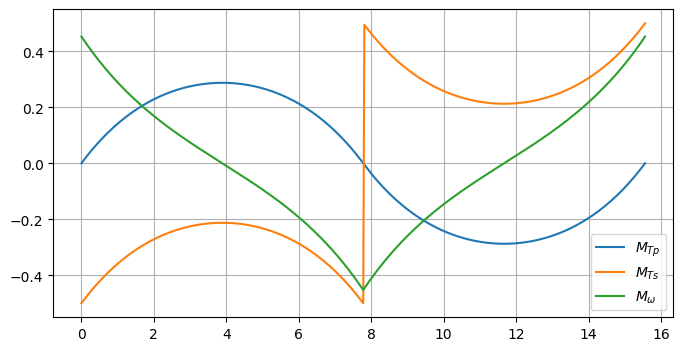

In [94]:
x_np = np.mgrid[0:l_:501j]

M_Ts_lambdified = sp.lambdify(x,M_Ts_, 'numpy')
M_Ts_np = M_Ts_lambdified(x_np)

M_Tp_lambdified = sp.lambdify(x,M_Tp_, 'numpy')
M_Tp_np = M_Tp_lambdified(x_np)

M_w_lambdified = sp.lambdify(x,M_w_, 'numpy')
M_w_np = M_w_lambdified(x_np)

M_ges_lambdified = sp.lambdify(x,M_ges_, 'numpy')
M_ges_np = M_ges_lambdified(x_np)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_np,M_Tp_np/M_T_, label='$M_{Tp}$')
ax.plot(x_np,-M_Ts_np/M_T_, label='$M_{Ts}$')
ax.plot(x_np,-M_w_np*lamb/M_T_, label='$M_{\omega}$')
# ax.plot(x_np,M_ges_np, label='$M_{T}$')
ax.grid(True,'major')
ax.legend()


Plot der Spannungen über die Stablänge $l$. Der Betrachtete Punkt im Querschnitt kann geändert werden indem die Werte für $y_{betrachtet}$ oder $z_{betrachtet}$ geändert werden.

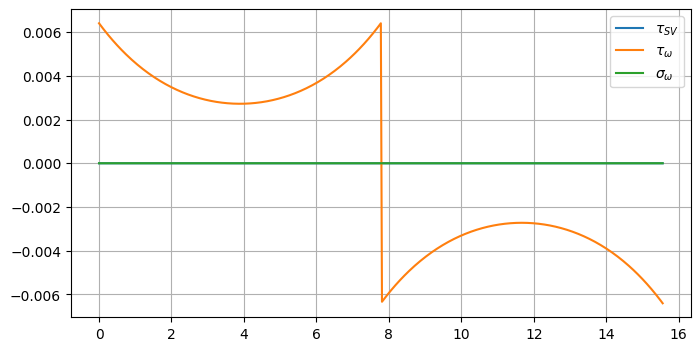

In [95]:
x_np = np.mgrid[0:l_:501j]
y_betrachtet = b_/2
z_betrachtet = h_/2

tau_SV_lambdified = sp.lambdify((x, z),tau_SV_, 'numpy')
tau_SV_np = tau_SV_lambdified(x_np, z_betrachtet)

# tau_w_np = get_np_vals(tau_w_,x_np,yzm)
tau_w_lambdified = sp.lambdify((x, y, z),tau_w_, 'numpy')
tau_w_np = tau_w_lambdified(x_np, y_betrachtet, z_betrachtet)

# sig_w_np = get_np_vals(sig_w_,x_np,yzm)
sig_w_lambdified = sp.lambdify((x, y, z),sig_w_, 'numpy')
sig_w_np = sig_w_lambdified(x_np, y_betrachtet, z_betrachtet)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_np,tau_SV_np, label='$\\tau_{SV}$')
ax.plot(x_np,tau_w_np, label='$\\tau_{\omega}$')
ax.plot(x_np,sig_w_np, label='$\sigma_{\omega}$')
ax.grid(True,'major')
ax.legend()


Der Faktor zwischen dem maximalen Werten der sekundären und primären Schubspannung beträgt:

In [96]:
np.max(tau_w_np)/np.max(tau_SV_np)

24129.24739282863

In [97]:
phi.evalf(subs={y:b_/2, z:h_/2, b:b_, h:h_, t_s:t_s_, t_g:t_g_})

256.484848484848